In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report

  reading data

In [3]:
df=pd.read_csv('house-votes-84.csv')
df.head()

,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,REP,NaN,y,n,y,y,y,n,n,n,y,?,y,y,NaN,n,y
1,Republican,NaN,y,n,y,y,y,n,n,n,n,n,y,y,NaN,n,?
2,DEM,NaN,y,y,?,y,y,n,n,n,n,y,n,y,NaN,n,n
3,DEM,NaN,y,y,n,?,y,n,n,n,n,y,n,y,NaN,n,y
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Party                                   414 non-null    object 
 1   Handicapped-infants                     25 non-null     float64
 2   Water-project-cost-sharing              414 non-null    object 
 3   Adoption-of-the-budget-resolution       414 non-null    object 
 4   Physician-fee-freeze                    414 non-null    object 
 5   El-salvador-aid                         414 non-null    object 
 6   Religious-groups-in-schools             414 non-null    object 
 7   Anti-satellite-test-ban                 414 non-null    object 
 8   Aid-to-nicaraguan-contras               414 non-null    object 
 9   MX-missile                              414 non-null    object 
 10  Immigration                             414 non-null    object

  EDA

In [7]:
df.isna().sum()

Party                                      43
Handicapped-infants                       432
Water-project-cost-sharing                 43
Adoption-of-the-budget-resolution          43
Physician-fee-freeze                       43
El-salvador-aid                            43
Religious-groups-in-schools                43
Anti-satellite-test-ban                    43
Aid-to-nicaraguan-contras                  43
MX-missile                                 43
Immigration                                43
Synfuels-corporation-cutback               43
Education-spending                         43
Superfund-right-to-sue                     43
Crime                                     457
Duty-free-exports                          43
Export-administration-act-south-africa     43
dtype: int64

In [9]:
df.duplicated().sum()

110

 data cleaning

In [11]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

Party                                       2
Handicapped-infants                       325
Water-project-cost-sharing                  2
Adoption-of-the-budget-resolution           2
Physician-fee-freeze                        2
El-salvador-aid                             2
Religious-groups-in-schools                 2
Anti-satellite-test-ban                     2
Aid-to-nicaraguan-contras                   2
MX-missile                                  2
Immigration                                 2
Synfuels-corporation-cutback                2
Education-spending                          2
Superfund-right-to-sue                      2
Crime                                     347
Duty-free-exports                           2
Export-administration-act-south-africa      2
dtype: int64

In [20]:
df.drop(columns=['Handicapped-infants','Crime'],inplace=True)

In [37]:
df.Party.dropna(axis=0,inplace=True)

In [39]:
df.isna().sum()


Party                                     2
Water-project-cost-sharing                2
Adoption-of-the-budget-resolution         2
Physician-fee-freeze                      2
El-salvador-aid                           2
Religious-groups-in-schools               2
Anti-satellite-test-ban                   2
Aid-to-nicaraguan-contras                 2
MX-missile                                2
Immigration                               2
Synfuels-corporation-cutback              2
Education-spending                        2
Superfund-right-to-sue                    2
Duty-free-exports                         2
Export-administration-act-south-africa    2
dtype: int64

In [26]:
obj=df.describe(include='object').columns
obj

Index(['Party', 'Water-project-cost-sharing',
       'Adoption-of-the-budget-resolution', 'Physician-fee-freeze',
       'El-salvador-aid', 'Religious-groups-in-schools',
       'Anti-satellite-test-ban', 'Aid-to-nicaraguan-contras', 'MX-missile',
       'Immigration', 'Synfuels-corporation-cutback', 'Education-spending',
       'Superfund-right-to-sue', 'Duty-free-exports',
       'Export-administration-act-south-africa'],
      dtype='object')

In [33]:
for col in obj:
    df[col].fillna(df[col].mode(),inplace=True)

In [35]:
df.isna().sum()

Party                                     2
Water-project-cost-sharing                2
Adoption-of-the-budget-resolution         2
Physician-fee-freeze                      2
El-salvador-aid                           2
Religious-groups-in-schools               2
Anti-satellite-test-ban                   2
Aid-to-nicaraguan-contras                 2
MX-missile                                2
Immigration                               2
Synfuels-corporation-cutback              2
Education-spending                        2
Superfund-right-to-sue                    2
Duty-free-exports                         2
Export-administration-act-south-africa    2
dtype: int64

In [41]:
df.Party.value_counts()

Party
DEM           82
Democrat      71
demo          67
Republican    47
repub         40
REP           38
Name: count, dtype: int64

In [43]:
df.Party.replace(['DEM','demo'],'Democrat',inplace=True)
df.Party.replace(['repub','REP'],'Republican',inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_19532\5214434.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Party.replace(['DEM','demo'],'Democrat',inplace=True)


In [73]:
df.Party.value_counts()          

Party
Democrat      220
Republican    125
Name: count, dtype: int64

  data visualization

<Axes: xlabel='Party'>

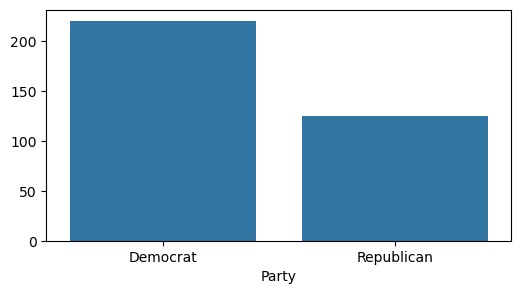

In [79]:
plt.figure(figsize=(6,3))
sns.barplot(x=df.Party.value_counts().index,y=df.Party.value_counts().values)


In [81]:
df.head()

,Party,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Duty-free-exports,Export-administration-act-south-africa
0,Republican,y,n,y,y,y,n,n,n,y,?,y,y,n,y
1,Republican,y,n,y,y,y,n,n,n,n,n,y,y,n,?
2,Democrat,y,y,?,y,y,n,n,n,n,y,n,y,n,n
3,Democrat,y,y,n,?,y,n,n,n,n,y,n,y,n,y
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Water-project-cost-sharing'>

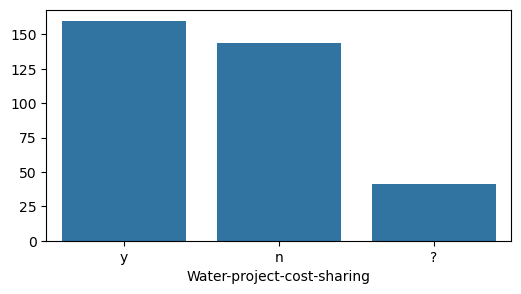

In [85]:
plt.figure(figsize=(6,3))
sns.barplot(x=df['Water-project-cost-sharing'].value_counts().index,y=df['Water-project-cost-sharing'].value_counts().values)

<Axes: xlabel='Immigration'>

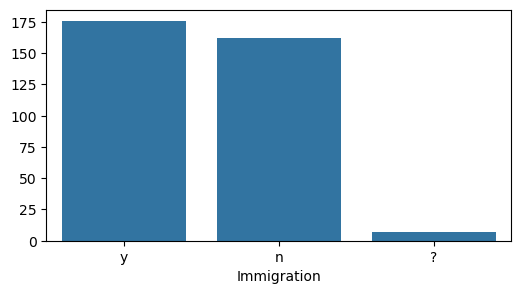

In [91]:
plt.figure(figsize=(6,3))
sns.barplot(x=df['Immigration'].value_counts().index,y=df['Immigration'].value_counts().values)

 feature engineering

In [97]:
for col in obj:
   le=LabelEncoder()                 
   df[col]=le.fit_transform(df[col])                                      


<Axes: >

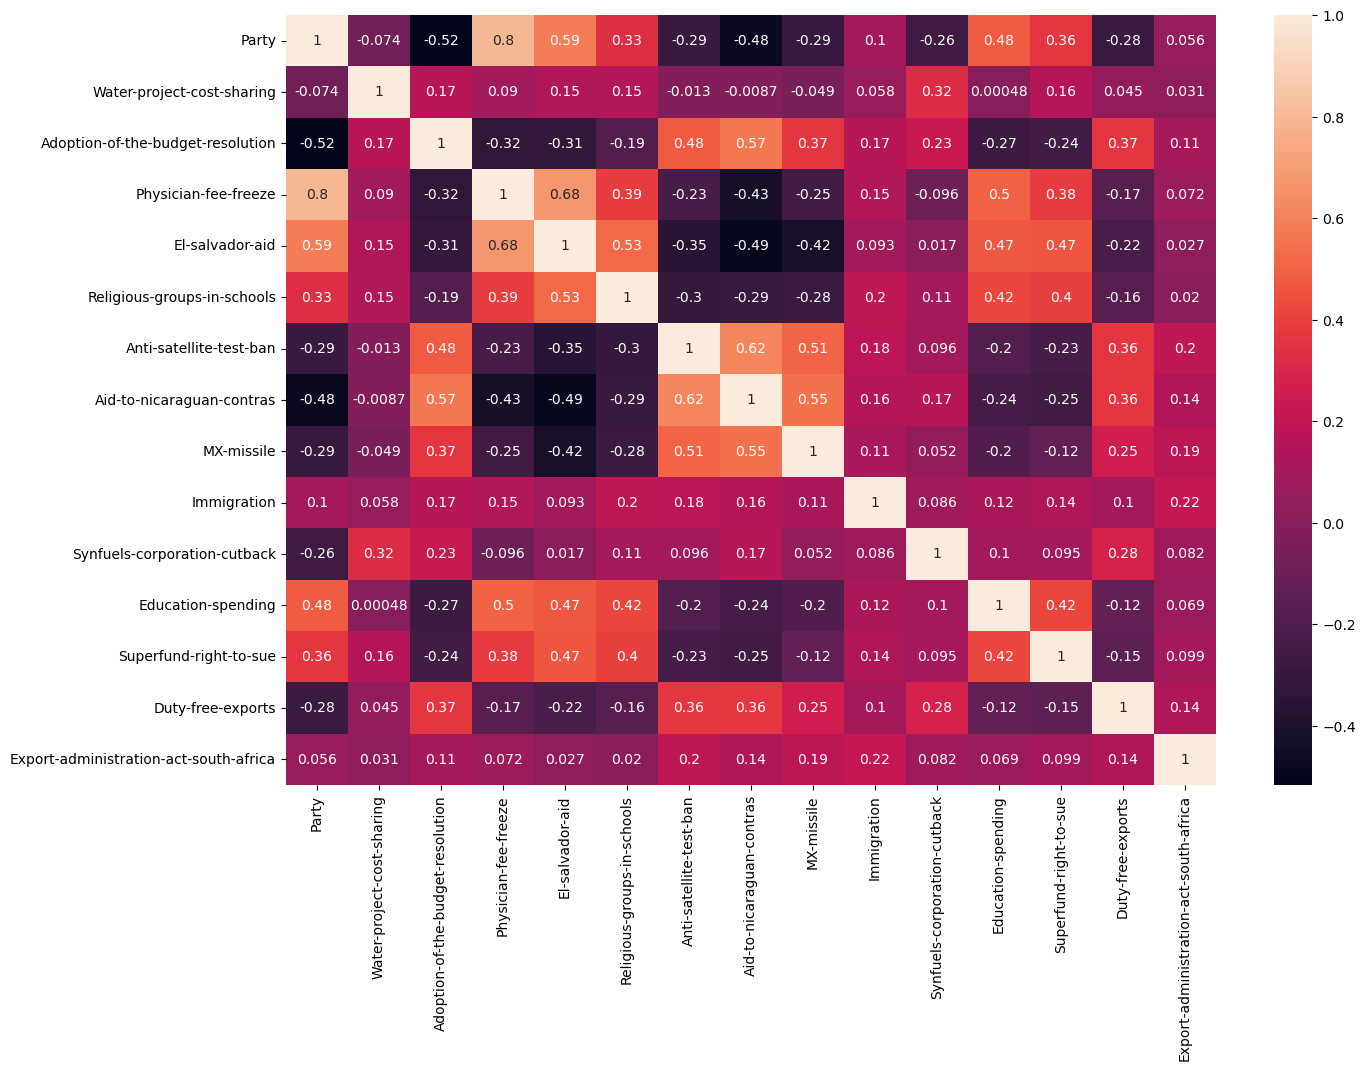

In [107]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

 split data

In [116]:
x=df.drop(columns='Party')
y=df['Party']

In [118]:
x_train, x_test,y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

LogisticRegression model building

In [122]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred1=lg.predict(x_test)

LogisticRegression model evaluation

In [124]:
accuracy_score(y_pred1, y_test)

0.9428571428571428

In [126]:
classification_report(y_pred1, y_test)

'              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95        42\n           1       0.93      0.93      0.93        28\n\n    accuracy                           0.94        70\n   macro avg       0.94      0.94      0.94        70\nweighted avg       0.94      0.94      0.94        70\n'

RandomForestClassifier model building

In [137]:
param={'criterion':['gini','entropy'],'n_estimators':[5,10,50]}
rf=RandomForestClassifier()
gs=GridSearchCV(rf,param,cv=3)
gs.fit(x_train,y_train)
best_model=gs.best_estimator_
y_pred7=best_model.predict(x_test)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


RandomForestClassifier model evluating

In [141]:
classification_report(y_pred7, y_test)

'              precision    recall  f1-score   support\n\n           0       0.95      0.93      0.94        43\n           1       0.89      0.93      0.91        27\n\n    accuracy                           0.93        70\n   macro avg       0.92      0.93      0.93        70\nweighted avg       0.93      0.93      0.93        70\n'

In [163]:
accuracy_score(y_pred7, y_test)

0.9285714285714286

SVC model building

In [147]:
svc=SVC(C=1.0,kernel='rbf', degree=3, gamma='scale')
svc.fit(x_train,y_train)
y_pred3=svc.predict(x_test)


SVC model evaluating

In [149]:
accuracy_score(y_pred3, y_test)

0.9857142857142858

In [151]:
classification_report(y_pred3, y_test)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99        41\n           1       1.00      0.97      0.98        29\n\n    accuracy                           0.99        70\n   macro avg       0.99      0.98      0.99        70\nweighted avg       0.99      0.99      0.99        70\n'

xgboost model building

In [154]:
from xgboost import XGBClassifier

In [156]:
xgb=XGBClassifier(n_estimators=10)
xgb.fit(x_train,y_train)
y_pred4=xgb.predict(x_test)

xgboost model evaluating

In [158]:
accuracy_score(y_pred4, y_test)

0.9714285714285714

In [161]:
classification_report(y_pred4, y_test)

'              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.98        40\n           1       1.00      0.93      0.97        30\n\n    accuracy                           0.97        70\n   macro avg       0.98      0.97      0.97        70\nweighted avg       0.97      0.97      0.97        70\n'

 SVC is the best performance model